In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report # for model evaluation metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transaction-fruad/Train_without_Data_balancing.csv
/kaggle/input/transaction-fruad/Test_without_Data_balancing.csv
/kaggle/input/its-a-fraud/train.csv
/kaggle/input/its-a-fraud/test.csv
/kaggle/input/its-a-fraud/mock_submission.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train=pd.read_csv("../input/transaction-fruad/Train_without_Data_balancing.csv")
train=train.drop(train.columns[0],axis=1)

In [5]:
train.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C3,C5,C13,D1,D4,D10,D15,M6,V12,V14,V15,V17,V19,V23,V24,V25,V26,V27,V29,V35,V37,V38,V39,V41,V42,V44,V46,V47,V48,V53,V55,V56,V59,V61,V62,V65,V66,V67,V68,V75,V77,V78,V80,V82,V83,V86,V87,V88,V89,V95,V98,V99,V100,V104,V107,V108,V109,V110,V111,V112,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V130,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V300,V302,V303,V305,V310,V311,V312,V313,V314,V319,V320,ProductCD_is_H,ProductCD_is_R,ProductCD_is_S,ProductCD_is_W,card4_is_american express,card4_is_discover,card4_is_mastercard,card6_is_charge card,card6_is_credit,card6_is_debit or credit,P_emaildomain_is_aim.com,P_emaildomain_is_anonymous.com,P_emaildomain_is_aol.com,P_emaildomain_is_att.net,P_emaildomain_is_bellsouth.net,P_emaildomain_is_cableone.net,P_emaildomain_is_centurylink.net,P_emaildomain_is_charter.net,P_emaildomain_is_comcast.net,P_emaildomain_is_cox.net,P_emaildomain_is_earthlink.net,P_emaildomain_is_embarqmail.com,P_emaildomain_is_frontier.com,P_emaildomain_is_frontiernet.net,P_emaildomain_is_gmail,P_emaildomain_is_gmail.com,P_emaildomain_is_goodmail,P_emaildomain_is_hotmail.com,P_emaildomain_is_hotmail.es,P_emaildomain_is_hotmail.fr,P_emaildomain_is_icloud.com,P_emaildomain_is_juno.com,P_emaildomain_is_live.com,P_emaildomain_is_live.com.mx,P_emaildomain_is_live.fr,P_emaildomain_is_mac.com,P_emaildomain_is_mail.com,P_emaildomain_is_me.com,P_emaildomain_is_msn.com,P_emaildomain_is_netzero.net,P_emaildomain_is_optonline.net,P_emaildomain_is_outlook.com,P_emaildomain_is_outlook.es,P_emaildomain_is_prodigy.net.mx,P_emaildomain_is_protonmail.com,P_emaildomain_is_q.com,P_emaildomain_is_roadrunner.com,P_emaildomain_is_rocketmail.com,P_emaildomain_is_sbcglobal.net,P_emaildomain_is_sc.rr.com,P_emaildomain_is_suddenlink.net,P_emaildomain_is_verizon.net,P_emaildomain_is_yahoo.com,P_emaildomain_is_yahoo.com.mx,P_emaildomain_is_yahoo.de,P_emaildomain_is_yahoo.es,P_emaildomain_is_yahoo.fr,P_emaildomain_is_ymail.com
0,0.0,49.00,5033,269.0,150.0,224.0,330.0,87.0,2.0,0.0,0.0,21.0,14.0,370.0,14.0,375.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,98.0,0.00,0.00,0.00,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,98.0,0.0,0.00,49.00,98.0,0.00,0.00,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,57.95,4527,376.0,150.0,226.0,441.0,87.0,2.0,0.0,1.0,14.0,136.0,136.0,136.0,136.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,229.8,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,229.8,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,115.95,2772,512.0,150.0,226.0,143.0,87.0,2.0,0.0,1.0,14.0,193.0,495.0,495.0,495.0,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00,107.95,107.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,107.95,107.95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,100.00,14290,512.0,150.0,226.0,177.0,87.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0

In [6]:
Train_target_df=train.loc[:,"isFraud"]
train.drop("isFraud",axis=1,inplace=True)

In [7]:
x_train_df=train
y_train_df=Train_target_df

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.20, random_state=0)

### functions

In [9]:
def Evalution(y_test,predictions): 
    score=metrics.accuracy_score(y_test, predictions)
    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    print(classification_report(y_test, predictions))
def AUC(model,x_test,y_test,predictions):
    metrics.plot_roc_curve(model, x_test, y_test) 
    fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
    # auc score
    print("AUC score: {}".format(metrics.auc(fpr, tpr)))
def Eval(model,X_over,y_over,x_test,y_test): 
    model.fit(X_over,y_over)
    predictions = model.predict(x_test)
    Evalution(y_test,predictions)
    AUC(model,x_test,y_test,predictions)

## Under Sampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [11]:
print(Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_over, y_over = undersample.fit_resample(x_train, y_train)
print(Counter(y_test))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 85429, 1.0: 3152})


In [12]:
print(Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy="majority")
X_over_m, y_over_m = undersample.fit_resample(x_train, y_train)
print(Counter(y_test))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 85429, 1.0: 3152})


### logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     85429
         1.0       0.14      0.24      0.18      3152

    accuracy                           0.92     88581
   macro avg       0.56      0.59      0.57     88581
weighted avg       0.94      0.92      0.93     88581

AUC score: 0.5934275679129871


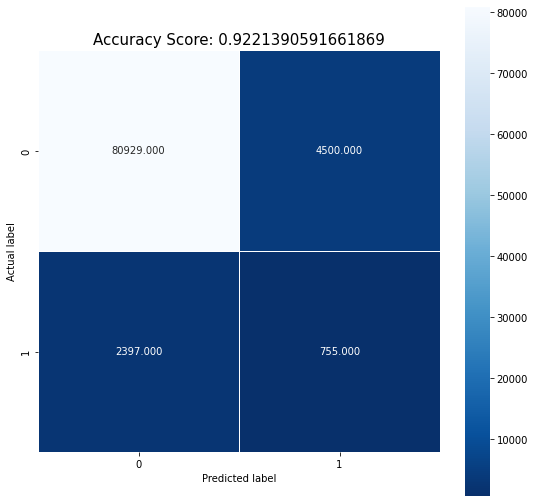

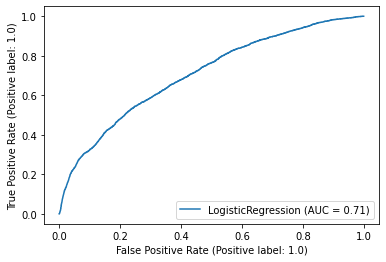

In [14]:
Eval(logisticRegr,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.59      0.74     85429
         1.0       0.06      0.69      0.11      3152

    accuracy                           0.60     88581
   macro avg       0.52      0.64      0.42     88581
weighted avg       0.95      0.60      0.72     88581

AUC score: 0.6426418410770414


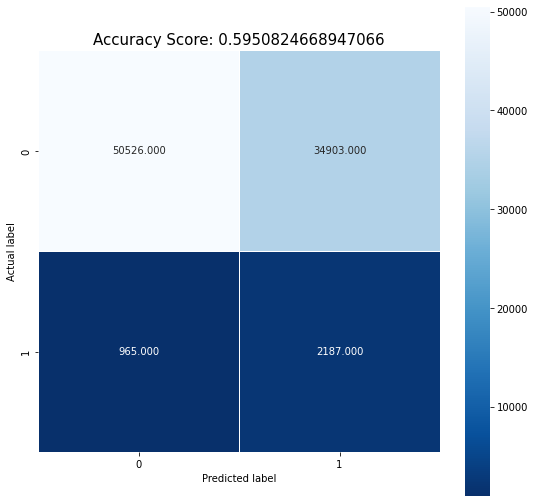

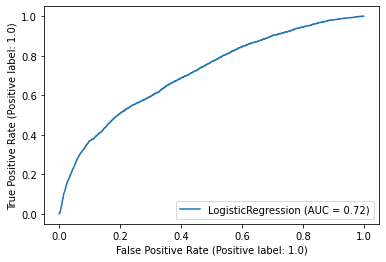

In [15]:
Eval(logisticRegr,X_over_m,y_over_m,x_test,y_test)

### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     85429
         1.0       0.16      0.37      0.22      3152

    accuracy                           0.91     88581
   macro avg       0.57      0.65      0.59     88581
weighted avg       0.95      0.91      0.93     88581

AUC score: 0.6482547114554057


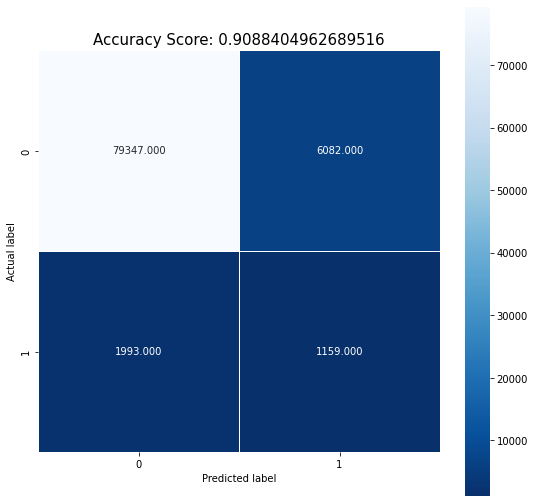

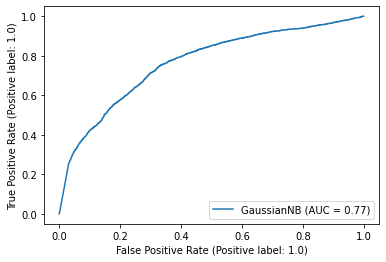

In [17]:
Eval(nb,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     85429
         1.0       0.16      0.38      0.22      3152

    accuracy                           0.91     88581
   macro avg       0.57      0.65      0.59     88581
weighted avg       0.95      0.91      0.92     88581

AUC score: 0.6518448424502836


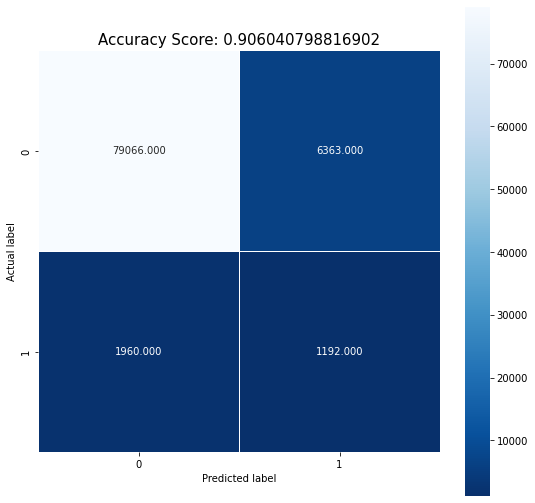

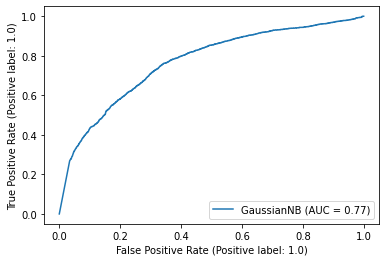

In [18]:
Eval(nb,X_over_m,y_over_m,x_test,y_test)

### RidgeClassifierCV

In [19]:
from sklearn.linear_model import RidgeClassifierCV
pac=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94     85429
         1.0       0.17      0.49      0.25      3152

    accuracy                           0.90     88581
   macro avg       0.57      0.70      0.60     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.6982515310306364


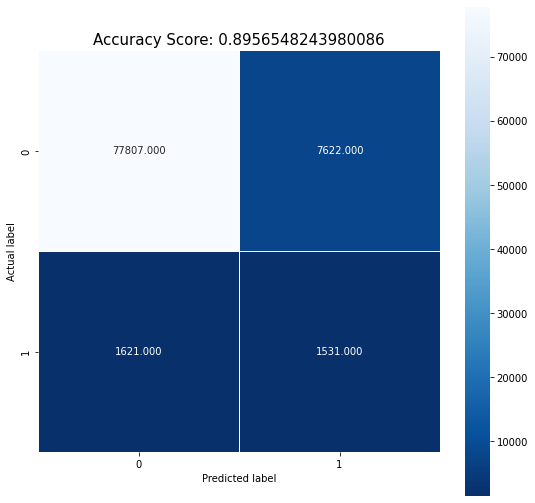

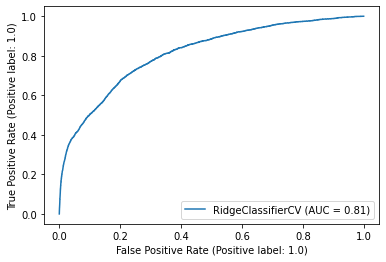

In [20]:
Eval(pac,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     85429
         1.0       0.10      0.72      0.18      3152

    accuracy                           0.76     88581
   macro avg       0.54      0.74      0.52     88581
weighted avg       0.96      0.76      0.83     88581

AUC score: 0.7413846660328198


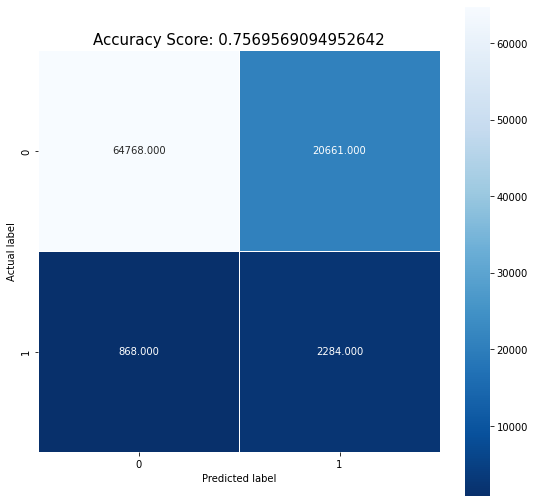

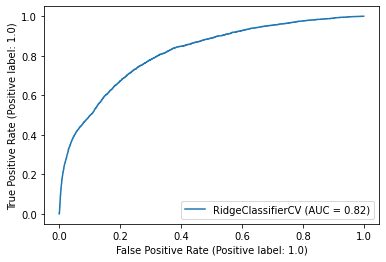

In [21]:
Eval(pac,X_over_m,y_over_m,x_test,y_test)

In [22]:
pac.get_params(deep=True)

{'alphas': array([0.001, 0.01 , 0.1  , 1.   ]),
 'class_weight': None,
 'cv': None,
 'fit_intercept': True,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

### Perceptron

In [23]:
from sklearn.linear_model import Perceptron

In [24]:
per=Perceptron(tol=1e-5)

              precision    recall  f1-score   support

         0.0       0.99      0.07      0.14     85429
         1.0       0.04      0.98      0.07      3152

    accuracy                           0.10     88581
   macro avg       0.51      0.53      0.10     88581
weighted avg       0.96      0.10      0.13     88581

AUC score: 0.5277156007128667


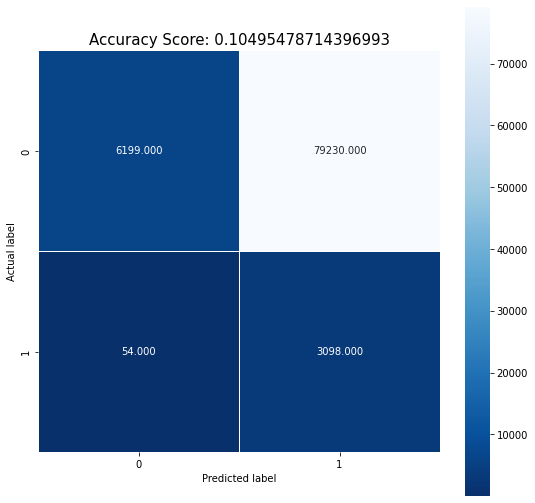

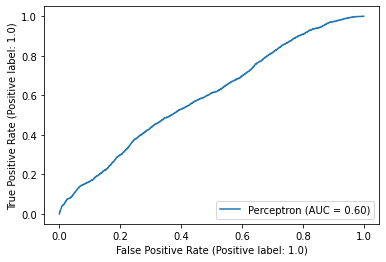

In [25]:
Eval(per,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.29      0.45     85429
         1.0       0.04      0.89      0.08      3152

    accuracy                           0.31     88581
   macro avg       0.52      0.59      0.27     88581
weighted avg       0.95      0.31      0.43     88581

AUC score: 0.5901610499662111


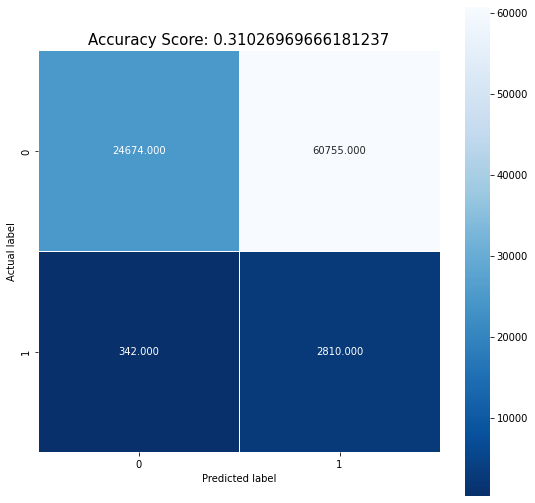

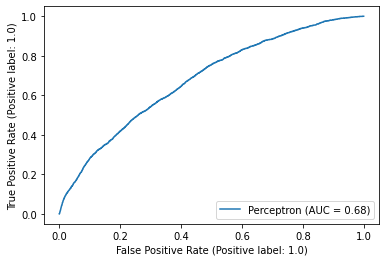

In [26]:
Eval(per,X_over_m,y_over_m,x_test,y_test)